/Users/austin/miniconda/lib/python2.7/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


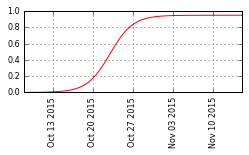

In [1]:
# Plot weighting function:
import numpy as np
import pickle
#from build_database import flux_obj
#from scipy import interpolate
from matplotlib import pyplot as plt
from GLD_file_tools import GLD_file_tools
from satellite import Satellite
import datetime
import ephem
from coordinate_structure import coordinate_structure
from coordinate_structure import transform_coords
from longitude_scaling import longitude_scaling
#from ionoAbsorp import ionoAbsorp
import os
from mpl_toolkits.basemap import Basemap
from precip_model import precip_model
from measurement_model import measurement_model
import itertools
import random
import matplotlib.tri as mtri
import matplotlib as mpl
from fluxMDP import get_map_scaling, get_time_scaling
from coordinate_structure import coordinate_structure


%matplotlib inline


# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 2.5 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 1.2 #fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 8,
          'font.size': 8,
          'legend.fontsize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': False,
          'figure.figsize': fig_size,        
          'figure.autolayout': True}
#           'figure.subplot.left': 0.04,
#           'figure.subplot.bottom':0.05,
#           'figure.subplot.top':0.995,
#           'figure.subplot.right':0.995}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------


#from scaling import get_time_scaling, get_map_scaling
# Growth-rate functions:

def utc(dt_obj):
    return (dt_obj - datetime.datetime(1970,1,1)).total_seconds()


start_time= datetime.datetime(2015,10, 8,0,0,00)
stop_time = datetime.datetime(2015,11,15,00,00,00)
td = datetime.timedelta(seconds=30)

cur_time = start_time
mid_time = start_time + datetime.timedelta(days=15)

greed = []
tvec = []
L = 0.95
k = 0.5

while cur_time < stop_time:
    cur_time += td
    tvec.append(cur_time)
    #print cur_time
    greed.append(L/(1 + np.exp(-k*((cur_time - mid_time).total_seconds()/(24*3600)))))

tl = [a.isoformat() for a in tvec]    

#plt.setp([a.get_xticklabels() for a in ax[0:-1]], visible=False)


plt.plot(tvec,np.array(greed),color='r')
plt.grid('on')
plt.ylim([0,1])
plt.xticks(rotation='vertical')
plt.savefig('greed_curve.png',dpi=300)


In [8]:
(stop_time - start_time).days

38